In [1]:
print("深层神经网络")

深层神经网络


In [5]:
import numpy as np
import torch
from torchvision.datasets import mnist
from torch import nn
from torch.autograd import Variable
%matplotlib inline

In [6]:
train_set = mnist.MNIST('./data', train=True, download=True)
test_set = mnist.MNIST('./data', train=True, download=True)


In [9]:
a_data, a_label = train_set[0]
a_data

In [10]:
a_label

5

In [11]:
a_data = np.array(a_data, dtype='float32')
print(a_data.shape)


(28, 28)


In [12]:
print(a_data)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

In [13]:
def data_tf(x):
    x = np.array(x, dtype='float32')/255
    x = (x-0.5)/0.5
    x = x.reshape((-1,))
    x = torch.from_numpy(x)
    return x


In [14]:
train_set = mnist.MNIST('./data', train=True, transform=data_tf, download=True)
test_set = mnist.MNIST('./data', train=False, transform=data_tf, download=True)

a, a_label = train_set[0]
print(a.shape)
print(a_label)


torch.Size([784])
5


In [15]:
from torch.utils.data import DataLoader
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(test_set, batch_size=128, shuffle=False)


In [16]:
a, a_label = next(iter(train_data))
print(a.shape)
print(a_label)


torch.Size([64, 784])
tensor([5, 6, 6, 0, 1, 1, 3, 3, 5, 0, 4, 5, 3, 5, 3, 4, 6, 7, 4, 5, 0, 4, 7, 8,
        0, 0, 8, 8, 1, 5, 4, 1, 3, 2, 4, 4, 7, 8, 2, 6, 4, 2, 8, 0, 8, 0, 5, 8,
        1, 7, 0, 6, 7, 4, 2, 0, 5, 9, 7, 3, 5, 7, 2, 4])


In [17]:
net = nn.Sequential(
    nn.Linear(784, 400),
    nn.ReLU(),
    nn.Linear(400, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

In [18]:
net

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), 1e-1)


In [20]:
losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(20):
    train_loss = 0
    train_acc = 0
    net.train()
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, pred = out.max(1)
        num_correct = (pred==label).sum().item()
        acc = num_correct/im.shape[0]
        train_acc += acc
    losses.append(train_loss/len(train_data))
    acces.append(train_acc/len(train_data))
    
    eval_loss = 0
    eval_acc =0
    net.eval()
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        eval_loss += loss.item()
        _, pred = out.max(1)
        num_correct = (pred==label).sum().item()
        acc = num_correct/im.shape[0]
        eval_acc += acc
    eval_losses.append(eval_loss/len(test_data))
    eval_acces.append((eval_acc/len(test_data)))
    
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'.format(e, train_loss/len(train_data), train_acc/len(train_data), eval_loss/len(test_data), eval_acc/len(test_data)))
    

epoch: 0, Train Loss: 0.511632, Train Acc: 0.835571, Eval Loss: 0.235506, Eval Acc: 0.923161
epoch: 1, Train Loss: 0.170690, Train Acc: 0.946279, Eval Loss: 0.123388, Eval Acc: 0.961333
epoch: 2, Train Loss: 0.119598, Train Acc: 0.963436, Eval Loss: 0.106976, Eval Acc: 0.966574
epoch: 3, Train Loss: 0.094525, Train Acc: 0.970982, Eval Loss: 0.094882, Eval Acc: 0.969937
epoch: 4, Train Loss: 0.077398, Train Acc: 0.975297, Eval Loss: 0.106895, Eval Acc: 0.966772
epoch: 5, Train Loss: 0.063606, Train Acc: 0.979461, Eval Loss: 0.072251, Eval Acc: 0.976365
epoch: 6, Train Loss: 0.056102, Train Acc: 0.982476, Eval Loss: 0.074028, Eval Acc: 0.977354
epoch: 7, Train Loss: 0.046330, Train Acc: 0.985125, Eval Loss: 0.076689, Eval Acc: 0.977255
epoch: 8, Train Loss: 0.038970, Train Acc: 0.987124, Eval Loss: 0.077128, Eval Acc: 0.976760
epoch: 9, Train Loss: 0.034163, Train Acc: 0.988789, Eval Loss: 0.070147, Eval Acc: 0.979430
epoch: 10, Train Loss: 0.029665, Train Acc: 0.990055, Eval Loss: 0.066

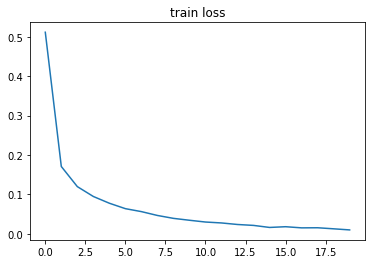

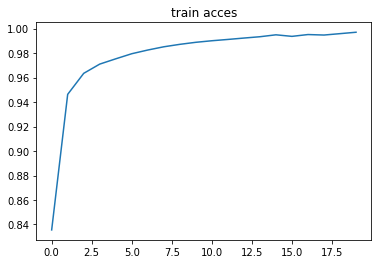

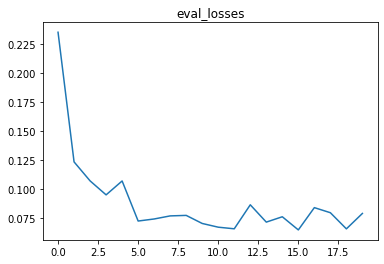

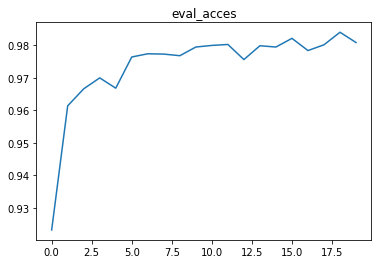

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.title('train loss')
plt.plot(np.arange(len(losses)), losses)
plt.figure()
plt.title('train acces')
plt.plot(np.arange(len(acces)), acces)
plt.figure()
plt.title('eval_losses')
plt.plot(np.arange(len(eval_losses)), eval_losses)
plt.figure()
plt.title('eval_acces')
plt.plot(np.arange(len(eval_acces)), eval_acces)